In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
df = pd.read_csv('/content/cleaned_pure_gym_reviews.csv', encoding="ISO-8859-1")
df.head()


,Name,Rating,Review,Unnamed: 3,Detailed,Sentiment,cleaned_review
0,Teo georgiev,5,My experience in pure gym has been goodâ¦,NaN,My experience in pure gym has been good overal...,Positive,my experience in pure gym has been good
1,Matthew James,3,"Itâs a good gym, more improvements can be done",NaN,Gym isoverrun with children under the age of 1...,Neutral,its a good gym more improvements can be done
2,Fergus,1,Joining fee is high,NaN,Not at all obvious which gyms I can access or ...,Negative,joining fee is high
3,Josh carton,2,Something needs to change,NaN,I think that puregym woolwhich are well aware ...,Negative,something needs to change
4,Cj west,5,Good,NaN,It was good and useful,Positive,good


In [5]:
df

,Name,Rating,Detailed,Sentiment,cleaned_review
0,Teo georgiev,5,My experience in pure gym has been good overal...,Positive,my experience in pure gym has been good
1,Matthew James,3,Gym isoverrun with children under the age of 1...,Neutral,its a good gym more improvements can be done
2,Fergus,1,Not at all obvious which gyms I can access or ...,Negative,joining fee is high
3,Josh carton,2,I think that puregym woolwhich are well aware ...,Negative,something needs to change
4,Cj west,5,It was good and useful,Positive,good
...,...,...,...,...,...
1668,Dave,4,NaN,Positive,good location and clean facilities
1669,Liam Weston,5,NaN,Positive,easy to navigate
1670,customer,3,easy joining process-however did not have Kla...,Neutral,easy joining processklarnayanganot sure
1671,Dean Grice,5,24hr opening makes it easy for me to fit my gy...,Positive,hr opening very convenient


In [6]:
# Function to classify sentiment based on rating
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    elif rating in [4, 5]:
        return "Positive"
    return "Unknown"

df['sentiment'] = df['Rating'].apply(rating_to_sentiment)

# Selection and renaming relevant columns
df_final = df[['Rating', 'sentiment', 'cleaned_review']].rename(columns={
    'Rating': 'rating',
    'cleaned_review': 'Review'
})

print(df_final.head())


   rating sentiment                                        Review
0       5  Positive       my experience in pure gym has been good
1       3   Neutral  its a good gym more improvements can be done
2       1  Negative                           joining fee is high
3       2  Negative                     something needs to change
4       5  Positive                                          good


Text(0.5, 1.0, 'Sentiment Data Distribution')

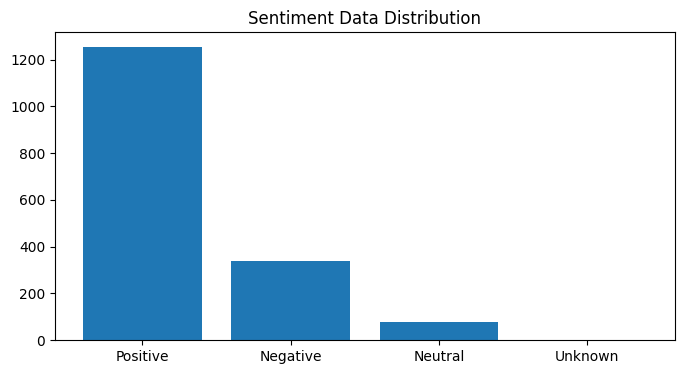

In [7]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

TEXT PREPROCESSING

In [8]:
# nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [9]:
# Cleaning and removing the stop words from review text
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

def cleaning_stopwords(Review):
    return " ".join([word for word in str(Review).split() if word not in stop_words])

df_final['Review'] = df_final['Review'].apply(lambda Review: cleaning_stopwords(Review))

df_final['Review'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review
0,experience pure gym good
1,good gym improvements done
2,joining fee high
3,something needs change
4,good


In [10]:
# Removing numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df_final['Review'] = df_final['Review'].apply(lambda x: remove_numbers(x))

Positive Words


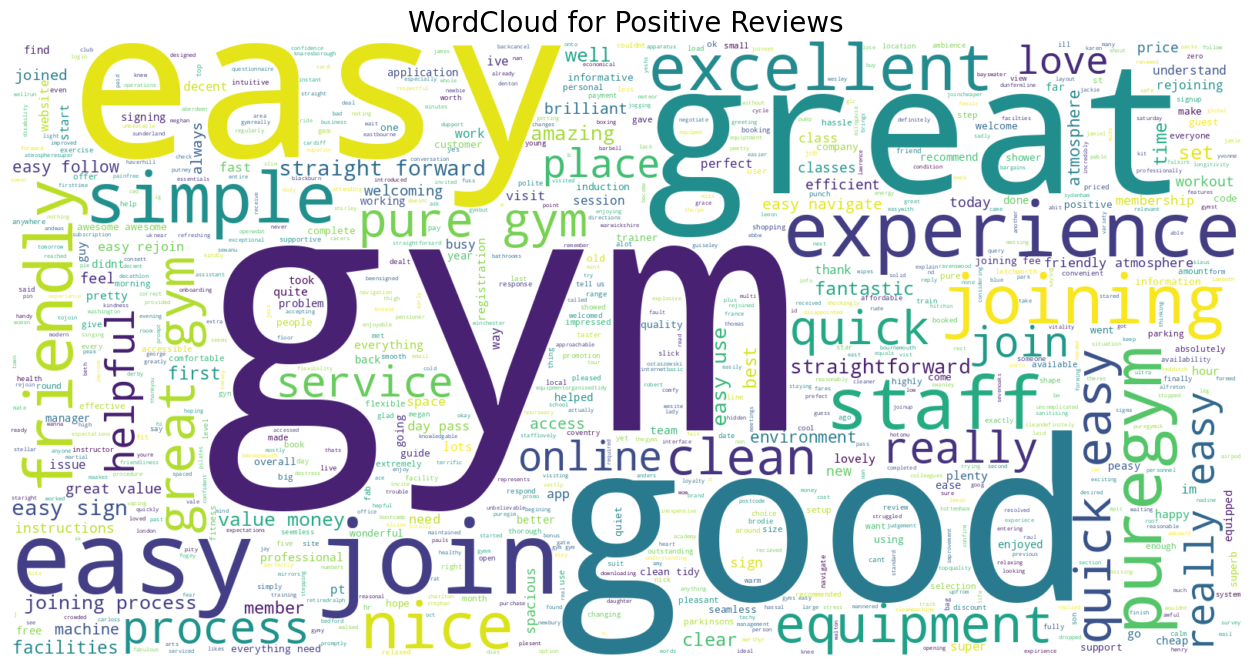

In [12]:
# Selecting only positive reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df_final[df_final.sentiment == 'Positive'].Review)

# Plotting WordCloud for positive sentiment
plt.figure(figsize=(16,8))
wordcloud = WordCloud(background_color='white', max_words=2000, width=1600, height=800).generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews', fontsize=20)
plt.show()

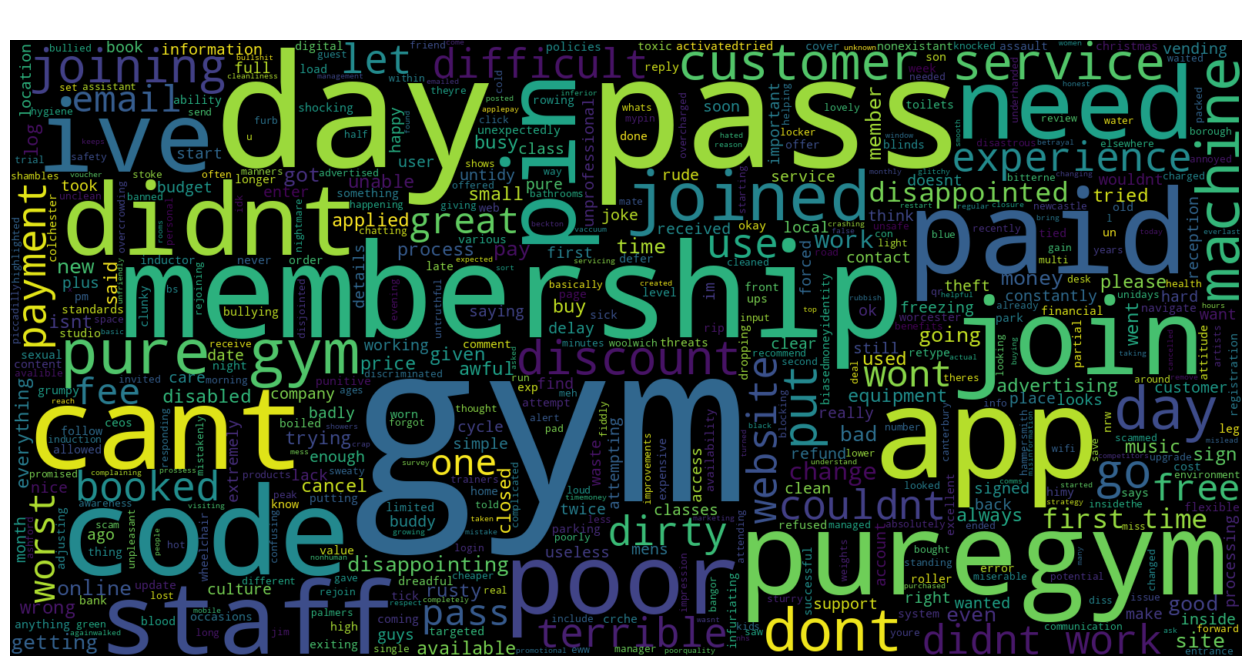

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generation of  text for negative reviews
negative_text = " ".join(df_final[df_final.sentiment == 'Negative'].Review)

plt.figure(figsize=(16, 8))
wordcloud = WordCloud(background_color='black', max_words=2000, width=1600, height=800).generate(negative_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews', fontsize=20, color='white')  # Title in white for better contrast
plt.show()


In [16]:
# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X = df_final['Review']
y = df_final['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-trainsize, random_state=123)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

Training Accuracy : 0.9086251067463706
Test Accuracy : 0.750996015936255
[[  7   0  99   0]
 [  0   0  23   0]
 [  2   0 370   0]
 [  0   0   1   0]]


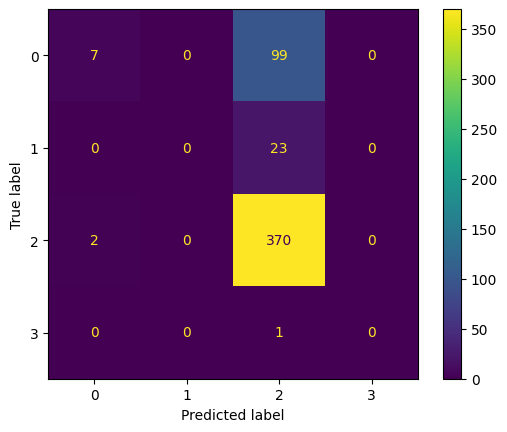

In [18]:
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy : 0.910333048676345
Test Accuracy : 0.7589641434262948
[[ 11   0  95   0]
 [  0   0  23   0]
 [  2   0 370   0]
 [  0   0   1   0]]


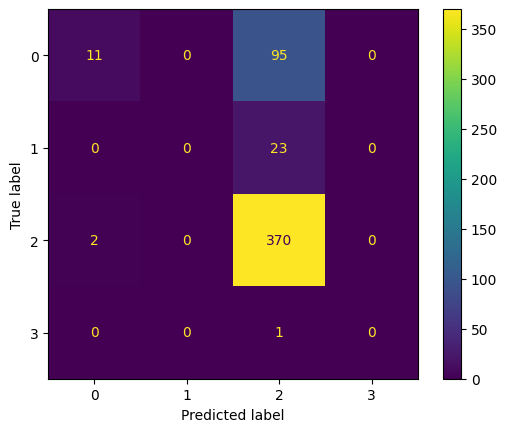

In [19]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd
import os

# Disable warnings clearly
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Function to load the pretrained tokenizer and model
def load_model(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    return tokenizer, model

# Function to compute sentiment scores for given text
def sentiment_score(text, tokenizer, model):
    tokens = tokenizer(text, truncation=True, padding=True, max_length=512, return_tensors="pt")

    with torch.no_grad():
        logits = model(**tokens).logits

    return softmax(logits.numpy()[0])  # Convert logits to probabilities clearly

# Load Dataset
df = pd.read_csv('/content/Cleaned_pure_gym_reviews (2).csv', encoding="ISO-8859-1")

# Confirm your DataFrame has the correct columns
print("Columns clearly loaded:", df.columns.tolist())

# Defining models clearly
models = {
    "RoBERTa": "cardiffnlp/twitter-roberta-base-sentiment",
    "DistilBERT": "distilbert-base-uncased-finetuned-sst-2-english"
}

# Run sentiment analysis using each pretrained model clearly
for model_name, model_path in models.items():
    print(f"\nUsing model: {model_name}")
    tokenizer, model = load_model(model_path)

    # Iterate through first 5 actual reviews from your DataFrame clearly
    for Review in df_final['Review'].head():
        scores = sentiment_score(Review, tokenizer, model)
        print(f'"{Review}" → Scores: {scores.round(3)}')


Columns clearly loaded: ['Name', 'Rating', 'Detailed', 'Sentiment', 'cleaned_review']

Using model: RoBERTa


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

"experience pure gym good" → Scores: [0.005 0.113 0.883]
"good gym improvements done" → Scores: [0.003 0.086 0.912]
"joining fee high" → Scores: [0.187 0.714 0.099]
"something needs change" → Scores: [0.279 0.67  0.051]
"good" → Scores: [0.057 0.28  0.663]

Using model: DistilBERT


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

"experience pure gym good" → Scores: [0. 1.]
"good gym improvements done" → Scores: [0. 1.]
"joining fee high" → Scores: [0.015 0.985]
"something needs change" → Scores: [0.895 0.105]
"good" → Scores: [0. 1.]
